# Kang et. al dataset preparation and minor analysis

In [1]:
import os
os.chdir("../")

In [2]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb

In [3]:
sc.settings.set_figure_params(dpi=200)

In [14]:
adata = sc.read('./data/kang/kang_count.h5ad')
adata

AnnData object with n_obs × n_vars = 13576 × 14053 
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'stim', 'seurat_annotations', 'integrated_snn_res.0.5', 'seurat_clusters', 'condition', 'cell_type'

In [17]:
adata.obs['condition'].value_counts()

stimulated    7217
control       6359
Name: condition, dtype: int64

In [18]:
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)

In [19]:
adata = adata[:, adata.var['highly_variable']]

In [20]:
adata

View of AnnData object with n_obs × n_vars = 13576 × 2000 
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'stim', 'seurat_annotations', 'integrated_snn_res.0.5', 'seurat_clusters', 'condition', 'cell_type', 'n_counts'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [21]:
adata.X.min(), adata.X.max()

(ArrayView(0., dtype=float32), ArrayView(6.941648, dtype=float32))

In [22]:
adata.obs['cell_type'].value_counts()

CD14 Mono    4362
CD4 T        4266
B            1366
CD16 Mono    1044
CD8 T         814
T             633
NK            619
DC            472
Name: cell_type, dtype: int64

In [12]:
os.makedirs("./data/kang/", exist_ok=True)

In [13]:
adata.write_h5ad("./data/kang/kang_normalized.h5ad")

In [23]:
special_cell_type = "NK"

In [24]:
cell_type_adata = adata[adata.obs["cell_type"] == special_cell_type]

In [25]:
cell_type_adata.obs['condition'].value_counts()

stimulated    321
control       298
Name: condition, dtype: int64

In [26]:
cell_type_adata.obs['condition'].cat.categories

Index(['control', 'stimulated'], dtype='object')

In [27]:
sc.tl.rank_genes_groups(cell_type_adata, groups=["stimulated"], groupby="condition", reference='control', n_genes=10)

In [29]:
top_genes = cell_type_adata.uns['rank_genes_groups']['names']['stimulated']
top_genes

array(['ISG15', 'IFIT1', 'IFIT3', 'IFITM3', 'TNFSF10', 'IFIT2', 'PRF1',
       'RSAD2', 'MT2A', 'B2M'], dtype='<U50')

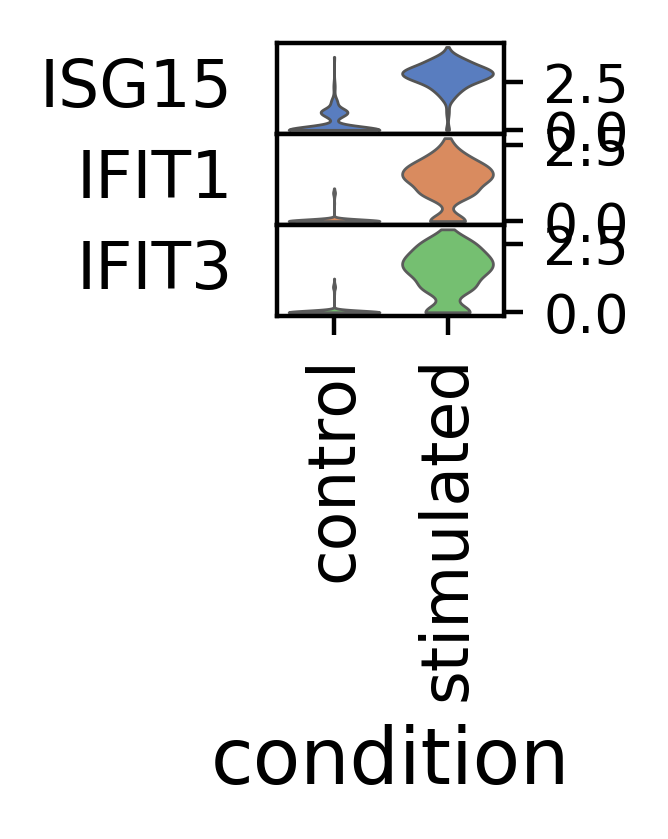

In [30]:
sc.pl.stacked_violin(cell_type_adata, groupby='condition', var_names=top_genes[:3], swap_axes=True)